In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import phys
from scipy.optimize import curve_fit
mpld3.enable_notebook()

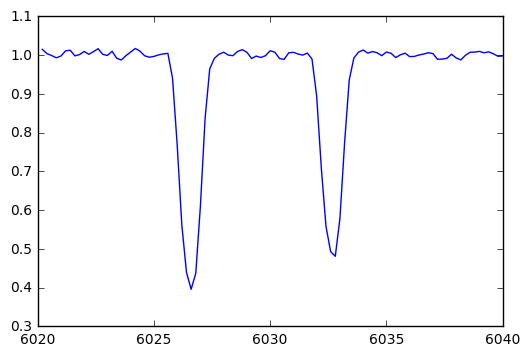

In [2]:
spec = np.genfromtxt("16abc_20160414_VLT_v1.ascii", names=["wavelength", "flux"])
idx = np.logical_and(spec["wavelength"] > 6020, 
                     spec["wavelength"] < 6040)
spec = spec[idx]
spec["flux"] /= np.median(spec["flux"])
plt.plot(spec["wavelength"], spec["flux"])

In [3]:
def Model(wv, z, v, c0, c1, c2):
    wv1 = 5895.92 * (1 + z)
    wv2 = 5889.95 * (1 + z)
    flux1 = c1 * np.exp(-0.5 * ((wv / wv1 - 1) * phys.c / v)**2)
    flux2 = c2 * np.exp(-0.5 * ((wv / wv2 - 1) * phys.c / v)**2)
    return flux1 + flux2 + c0

In [4]:
popt, pcov = curve_fit(Model, spec["wavelength"], spec["flux"],
                       p0=[0.0232, 20e5, 1, 0.6, 0.5])

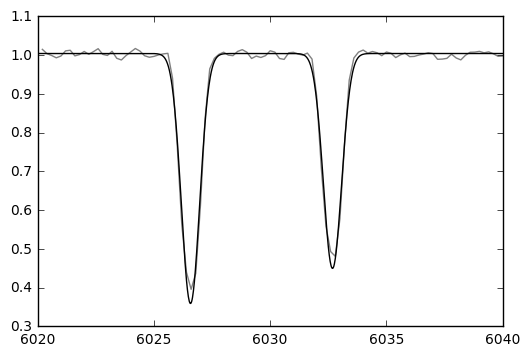

In [5]:
plt.plot(spec["wavelength"], spec["flux"], color="gray")
wv = np.linspace(6020, 6040, 1001)
plt.plot(wv, Model(wv, *popt), color='k')

In [6]:
z = popt[0]
z_err = np.sqrt(pcov[0][0])
v = popt[1]
v_err = np.sqrt(pcov[1][1])
print("redshift = %.7f +/- %.7f\nvelocity = %4.1f +/- %4.1f km/s" % (z, z_err, v / 1e5, v_err/1e5))

redshift = 0.0231959 +/- 0.0000008
velocity = 19.5 +/-  0.3 km/s


In [7]:
c0 = popt[2]
c0_err = np.sqrt(pcov[2][2])
c1 = popt[3]
c1_err = np.sqrt(pcov[3][3])
c2 = popt[4]
c2_err = np.sqrt(pcov[4][4])
wv1 = 5895.92 * (1 + z)
wv2 = 5889.95 * (1 + z)

ew1 = -np.sqrt(2. * np.pi) * c1 / c0 * wv1 * v / phys.c
ew1_err = ew1 * ((c0_err / c0)**2 + (c1_err / c1)**2)**0.5
ew2 = -np.sqrt(2. * np.pi) * c2 / c0 * wv2 * v / phys.c
ew2_err = ew2 * ((c0_err / c0)**2 + (c2_err / c2)**2)**0.5

print("EW = %.3f +/- %.3f, %.3f +/- %.3f" % (ew1, ew1_err, ew2, ew2_err))

EW = 0.542 +/- 0.008, 0.630 +/- 0.008


In [8]:
EBV = 10**(1.17 * (ew1 + ew2) - 1.85)  # Poznanski et al. 2012
EBV_err = np.log(10) * EBV * (1.17**2 * (ew1_err**2 + ew2_err*2) + 0.08**2)
print("E(B-V) = %.3f +/- %.3f" % (EBV, EBV_err))

E(B-V) = 0.332 +/- 0.022


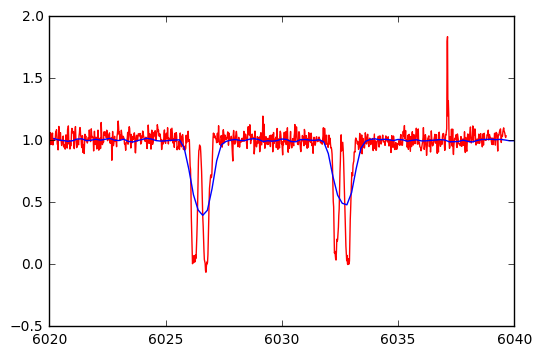

In [10]:
spec = np.genfromtxt("16abc_20160416_VLT_v1.ascii", names=["wavelength", "flux"])
idx = np.logical_and(spec["wavelength"] > 6020, 
                     spec["wavelength"] < 6040)
spec = spec[idx]
spec["flux"] /= np.median(spec["flux"])
plt.plot(spec["wavelength"], spec["flux"], 'r')
spec = np.genfromtxt("16abc_20160414_VLT_v1.ascii", names=["wavelength", "flux"])
idx = np.logical_and(spec["wavelength"] > 6020, 
                     spec["wavelength"] < 6040)
spec = spec[idx]
spec["flux"] /= np.median(spec["flux"])
plt.plot(spec["wavelength"], spec["flux"], 'b')

[  2.31381952e-02   5.07378825e+05   2.32240802e-02   5.66103792e+05
   1.00999009e+00  -9.85653599e-01  -1.11825798e+00  -1.03574723e+00
  -1.11890037e+00]


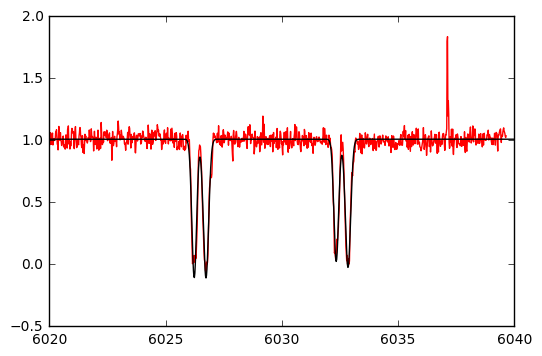

In [14]:
spec = np.genfromtxt("16abc_20160416_VLT_v1.ascii", names=["wavelength", "flux"])
idx = np.logical_and(spec["wavelength"] > 6020, 
                     spec["wavelength"] < 6040)
spec = spec[idx]
spec["flux"] /= np.median(spec["flux"])
plt.plot(spec["wavelength"], spec["flux"], 'r')

def NewModel(wv, z1, v1, z2, v2, c0, c11, c12, c21, c22):
    return Model(wv, z1, v1, c0, c11, c12) + Model(wv, z2, v2, 0, c21, c22)

popt, pcov = curve_fit(NewModel, spec["wavelength"], spec["flux"],
                       p0=[0.0232, 10e5, 0.0232, 10e5, 1, 1.0, 1.0, 1.0, 1.0])
wv = np.linspace(6020, 6040, 1001)
plt.plot(wv, NewModel(wv, *popt), color='k')
print(popt)

In [53]:
z_gal = 0.0233303
z_gal_err = 0.000027
z = popt[0]
z_err = np.sqrt(pcov[0][0])
v = (z_gal - z) * phys.c
v_err = np.sqrt(z_gal_err**2 + z_err**2) * phys.c
print("redshift = %.8f +/- %.8f\nvelocity = %4.1f +/- %4.1f km/s" % (z, z_err, v / 1e5, v_err/1e5))
z = popt[2]
z_err = np.sqrt(pcov[2][2])
v = (z_gal - z) * phys.c
v_err = np.sqrt(z_gal_err**2 + z_err**2) * phys.c
print("redshift = %.8f +/- %.8f\nvelocity = %4.1f +/- %4.1f km/s" % (z, z_err, v / 1e5, v_err/1e5))

redshift = 0.02313820 +/- 0.00000032
velocity = 57.6 +/-  8.1 km/s
redshift = 0.02322408 +/- 0.00000033
velocity = 31.8 +/-  8.1 km/s


In [21]:
c0 = popt[4]
c0_err = np.sqrt(pcov[4][4])
c11 = popt[5]
c11_err = np.sqrt(pcov[5][5])
c12 = popt[6]
c12_err = np.sqrt(pcov[6][6])
c21 = popt[7]
c21_err = np.sqrt(pcov[7][7])
c22 = popt[8]
c22_err = np.sqrt(pcov[8][8])
wv1 = 5895.92 * (1 + z)
wv2 = 5889.95 * (1 + z)

ew11 = -np.sqrt(2. * np.pi) * c11 / c0 * wv1 * v / phys.c 
ew11_err = ew11 * ((c0_err / c0)**2 + (c11_err / c11)**2)**0.5
ew12 = -np.sqrt(2. * np.pi) * c12 / c0 * wv1 * v / phys.c
ew12_err = ew12 * ((c0_err / c0)**2 + (c12_err / c12)**2)**0.5

ew21 = -np.sqrt(2. * np.pi) * c21 / c0 * wv2 * v / phys.c
ew21_err = ew21 * ((c0_err / c0)**2 + (c21_err / c21)**2)**0.5
ew22 = -np.sqrt(2. * np.pi) * c22 / c0 * wv2 * v / phys.c
ew22_err = ew22 * ((c0_err / c0)**2 + (c22_err / c22)**2)**0.5

ew1 = ew11 + ew12
ew1_err = np.sqrt(ew11_err**2 + ew12_err**2)
ew2 = ew21 + ew22
ew2_err = np.sqrt(ew21_err**2 + ew22_err**2)

print("EW = %.3f +/- %.3f, %.3f +/- %.3f" % (ew1, ew1_err, ew2, ew2_err))

EW = 0.595 +/- 0.009, 0.609 +/- 0.008


In [22]:
EBV = 10**(1.17 * (ew1 + ew2) - 1.85)  # Poznanski et al. 2012
EBV_err = np.log(10) * EBV * (1.17**2 * (ew1_err**2 + ew2_err*2) + 0.08**2)
print("E(B-V) = %.3f +/- %.3f" % (EBV, EBV_err))

E(B-V) = 0.361 +/- 0.025


TypeError: 55 is not JSON serializable

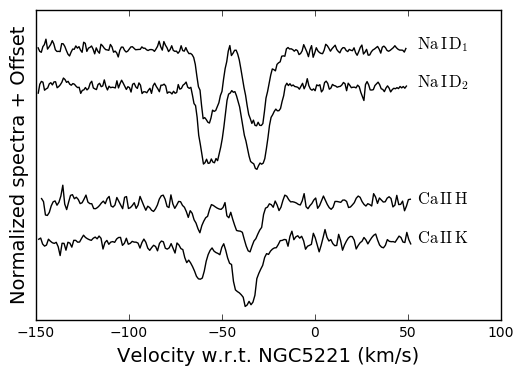

In [52]:
z_gal = 0.0233303

wv = 5895.92 * (1 + z_gal)
idx = np.logical_and(spec["wavelength"] > wv - 3, 
                     spec["wavelength"] < wv + 1)
plt.plot((spec[idx]['wavelength'] / wv - 1) * phys.c / 1e5, spec[idx]['flux'], 'k')
plt.text(55, 1, "$\\rm{Na\\,I\\,D}_1$", fontsize=12)

wv = 5889.95 * (1 + z_gal)
spec = np.genfromtxt("16abc_20160416_VLT_v1.ascii", names=["wavelength", "flux"])
idx = np.logical_and(spec["wavelength"] > wv - 3, 
                     spec["wavelength"] < wv + 1)
plt.plot((spec[idx]['wavelength'] / wv - 1) * phys.c / 1e5, spec[idx]['flux'] - 0.5, 'k')
plt.text(55, 0.5, "$\\rm{Na\\,I\\,D}_2$", fontsize=12)

wv = 3968.5 * (1 + z_gal)
idx = np.logical_and(spec["wavelength"] > wv - 2, 
                     spec["wavelength"] < wv + 0.7)
plt.plot((spec[idx]['wavelength'] / wv - 1) * phys.c / 1e5, spec[idx]['flux'] - 2, 'k')
plt.text(55, -1, "$\\rm{Ca\\,II\\,H}$", fontsize=12)

wv = 3933.7 * (1 + z_gal)
idx = np.logical_and(spec["wavelength"] > wv - 2, 
                     spec["wavelength"] < wv + 0.7)
plt.plot((spec[idx]['wavelength'] / wv - 1) * phys.c / 1e5, spec[idx]['flux'] - 2.5, 'k')
plt.text(55, -1.5, "$\\rm{Ca\\,II\\,K}$", fontsize=12)

plt.xlim(-150, 100)
plt.yticks([])
plt.xlabel("Velocity w.r.t. NGC5221 (km/s)", fontsize=14)
plt.ylabel("Normalized spectra + Offset", fontsize=14)

plt.savefig("narrow_abs_features.pdf")